> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate the No-show appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.


> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
 The encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
 
> As I go through the dataset and derive insights from it, I would like to find out the answers for all the below questions based on my analysis : -

> 1. Which gender is most likely to show up for their scheduled appointment?
> 2. Who has the more chance of appearing for the scheduled appointment ? one suffering from     Hipertension or one suffering from Diabetes?
> 3. Who has the more chance of appearing for the scheduled appointment ? one suffering from Alcoholism or one who is a handcap?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

dataset = 'noshowappointments-kagglev2-may-2016.csv'





<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Declaring a dataframe df in which the data will be loaded

df = pd.read_csv(dataset)

# Printing out first 10 rows of the dataframe

df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Data is checked for Null values, duplicates, outliers)

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Checking for Null values in the dataset for all rows

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Checking the datatypes of all the columns

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
#Checing for the description of each numerical columns

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
###It is observed that the min value of Age is -1 which is an unrealistic scenario. Hence the row is dropped

df = df[df.Age != -1]



In [8]:
#Checking for the duplicate rows in the dataset

sum(df.duplicated())

0

After the Data Wrangling part, it is evident that the dataset is quite consistent and clean with no Null or duplicate values and the outliers has been removed.
Moving forward, all the columns which are not required in our data analysis are dropped.

In [9]:
df.drop(['PatientId' , 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)

df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which gender is most likely to show up for their scheduled appointment

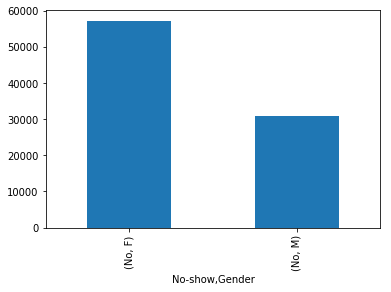

In [10]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Creating a temporary dataframe with only consisting of the the people who have arrived for their scheduled appoinment

df_arrived = df[df['No-show'] == 'No']

#Plotting the bar chart to visulaize which gender is most likely to appear for the scheduled appointment

df_arrived.groupby('No-show')['Gender'].value_counts().plot(x = 'Gender', y = 'Arrived for Appointment', kind = 'bar');

In [11]:
##For the below two analysis , we will create a common function which will be called upon with corresponding parameters 
##for relevant analysis.

def plot_graph(col1,col2):
    df_col1 = df[df[col1] == 1]
    df_col2 = df[df[col2] == 1]
    df_col1_present = df_col1[df_col1['No-show'] == 'No']
    df_col2_present = df_col2[df_col2['No-show'] == 'No']

    df_col1_present['No-show'].value_counts().plot(kind = 'bar', color = 'green', label =col1);
    df_col2_present['No-show'].value_counts().plot(kind = 'bar', color = 'orange', label = col2);
    plt.legend();

### Who has the more chance of appearing for the scheduled appointment ? one suffering from Hipertension or one suffering from Diabetes?

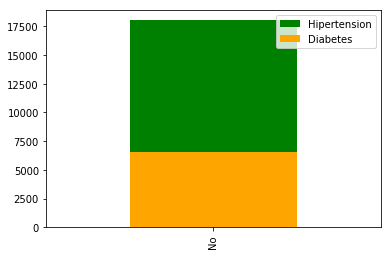

In [12]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#Creating two temporary dataframes for the analysis

plot_graph('Hipertension', 'Diabetes')



### Communication : -

It is quite strange that a Diabetes patient is less likely to appear for their appointment. It shows that Hipertension is considered a bigger worry for the locals that Diabetes.

### Who has the more chance of appearing for the scheduled appointment ? one suffering from Alcoholism or one who is a handicap?

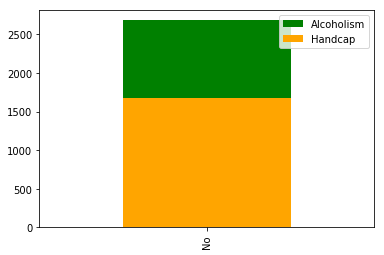

In [13]:
plot_graph('Alcoholism','Handcap')

### Communication : -
    
As expected concerns with Alcoholism is growly rapidly these days and with more number of people suffering from alcoholism visting for their scheduled appointment is by no means a coincidence.

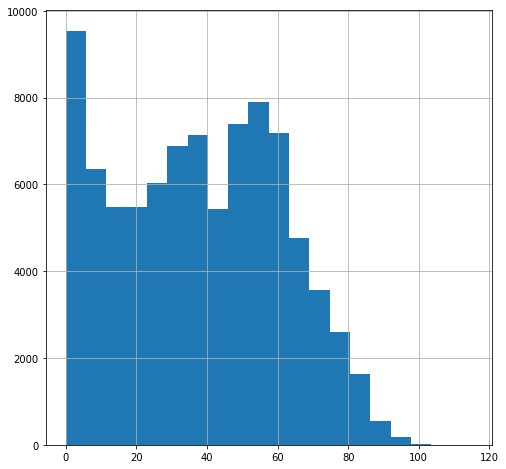

In [14]:
###Below is the plot which shows age distributions of the patients who appeared on their scheduled appoinment

# Creating a temporary dataframe with only consisting of the the people who have arrived for their scheduled appoinment

df_age_arriv = df[df['No-show'] == 'No']

#Plotting the Histogram chart to visulaize which gender is most likely to appear for the scheduled appointment

df_age_arriv['Age'].hist(bins = 20, figsize = (8,8));

### Analysis 

From the above age distribution for the people who arrived for scheduled appointment, it is evident that the younger people are more likely to appear than those above 70.


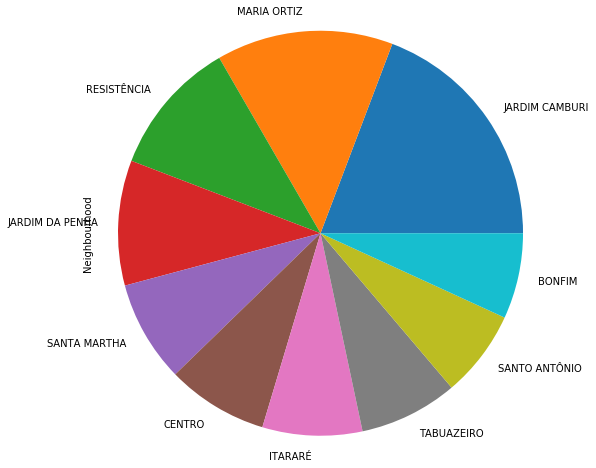

In [23]:
### Plot to show the most common neighbourhood for the people who arrived for scheduled appointment

df_neighbour_arriv = df[df['No-show'] == 'No']

#Plotting the pie chart to visulaize which neighbourhood is most common for people to appear for the scheduled appointment

df_neighbour_arriv.Neighbourhood.value_counts()[:10].plot(kind='pie', figsize = (8,8));
plt.axis('equal');


## Analaysis : -

From the above pie chart, it is clear that people from JARDIM CAMBURI have appeared for their appointment more than any other
neighbourhood followed by Maria Ortiz

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

### After visualizing the data from the above three scnerios the derived conclusions are : -
1. Female population are more likely to arrive for their scheduled apartment than male.
2. The person suffering from Hipertenson is more likely to show up for their scheduled appoinent than the one sufering from     Diabetes.
3. The one with Alocholism is more likely to show up for scheduled appointment than the one who is Handcap.

### Limitations : 

While the dataset was moreover clean there were few unexpected scenarios which are follows : -

1. The minimum age in the initial dataset was -1 , which is impossible. Hence it was an outlier and during data cleaning phase I removed it from the dataset to proceed with further analysis.
2. The analysis relating Hipertension and Diabetes was a bit surprising to me. Diabetes being a global concern, I expected more people to appear for their scheduled appointment which is not the case.
3. After plotting the age distribution, it was surprising to see so many people below 40 are appearing for their appointment whereas the number decreased with age. This is an unsual trend beacuse older people are supposed to appear for their appointment more than the younger ones.
    
These were the few unusual instances I found from my analysis.

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0